<img src="../image/logo-cefet.png" width="300">

<h1> PPCIC Dissertação - 2021
    <br>
    <br>
    DETECÇÃO DE EVENTOS ADVERSOS ATRAVÉS DO TWITTER UTILIZANDO O METAMAP PARA O PORTUGUÊS DO BRASIL </h1>
</br>

<h2> Matéria: CIC1229 - TÓPICOS ESPECIAIS EM ALGORITMOS </h2>
<h2> Aluno: Perciliano </h2>
<h2> Orientadora: Kele Belloze </h2>
<h3> Data: 01/07/2021 </h3>

---

**Autor: Luiz Perciliano** - 
***luiz.perciliano@eic.cefet-rj.br***

- <b>Dados da pesquisa na base SCOPUS e PubMed - antes eram 505 documentos para pesquisa com nova anáilse foi para 436</b>

<br>

**Feito**
- Pesquisa em bases indexadas:
    - 458 SCOPUS
    - 252 PubMed
    - 710 total de artigos
    - 436 (duplicados / filtros)
- Dos 6+ (documentos), lido 5+ resumos, um artigo tem 3 páginas e não foi possível encontrar PDF
- Dos 94+ (documentos), lido 84 resumos


**A Fazer**
- Dos artigos faltantes (350), iniciar leitura dos últimos 5 anos [2021 a 2017]
    - traduzir titulos e abstracts (OK)
    - base SCOPUS (159 artigos) iniciando do + antigo (OK)
    - base PUBMED (12 artigos) iniciando do + antigo
    
    Os artigos do PubMed, não necessariamente não estão no SCOPUS, é a string que não encontrou no SCOPUS
    <br>
    
    - artigos sem abstract serão deixados por último
- Instalar nova versão do Metamap e DFB
    - Houve problema no início da instalação, enviado mail p/ Will em 26/06/2021
    - Dia 28/06/2021 Will responde e acha que pode ser problema de bash (RHEL7 x Ubuntu, pediu para eu ajustar um arquivo e ele já ajustou por lá também)
    - Executei os testes e enviei mail dia 29/06/2021 com outros traumas
    - Dia 29/06/2021 Will responde e pede para ajustar um erro introduzido no script e q tbm atualizou este no site
    - Dia 30, ajustado, ainda com erro no MRCONSO, Will disse que verificará, enviei outro mail com erro no ./03
- Andamento do projeto (verificar planilha de análise)

<b>Site do projeto:</b> https:git.com
<br>
**Endereço da dissertação:** https://pt.overleaf.com/project/60731ca2bcfa0afce8ae0cd1

---

# Preparar Infraesrtutura

In [1]:
print(f'Importar as bibliotecas necessárias e mapear a pasta do projeto.')
import os
import sys
import pandas as pd
import datetime

import matplotlib.pyplot as plt
%matplotlib inline

from google_trans_new import google_translator  

Importar as bibliotecas necessárias e mapear a pasta do projeto.


In [2]:
data_inicio = pd.Timestamp.now()
print(f'Iniciando o programa em: ',data_inicio)

Iniciando o programa em:  2021-07-01 19:02:29.507816


In [3]:
print(f'Lista do conteúdo da pasta ...')
os.listdir(os.path.join('..','data'))

Lista do conteúdo da pasta ...


['base-qualis-06-06-2021.xlsx',
 'bases_filtradas-v008 - Copia.xlsx',
 'bases_filtradas-v008.xlsx',
 'bases_filtradas_traduzida-27-06-2021.xlsx',
 'Evaluation-of-Natural-Language-Processing-NLP-systems-to-annotate-drug-product-labeling-with-MedDRA-terminologyJournal-of-Biomedical-Informatics.pdf',
 'old',
 'pubmed.csv',
 'PubMed_Timeline_Results_by_Year-10-06-2021.csv',
 'requiremets.txt',
 'resultado_pubmed.xlsx',
 'resultado_scopus-19-06-2021 - Copia.xlsx',
 'resultado_scopus-19-06-2021.xlsx',
 'scopus-12-06-2021-luciana.csv',
 'scopus-94 - Copia.csv',
 'scopus-94-clean.csv',
 'scopus-94-clean.xlsx',
 'scopus-94.csv',
 'scopus.csv',
 'stop_word_projeto.csv',
 'stop_word_pt.csv',
 '~$bases_filtradas-v008.xlsx',
 '~$resultado_scopus-19-06-2021.xlsx',
 '~$resultado_scopus-luciana-12-06-2021.xlsx']

In [4]:
os.listdir('../Image')

['logo-cefet.png', 'Logo_CVM.png', 'puc-rio-logo.png', 'wordcloud.pdf']

# Preparar e carregar base de dados

## Carregar Planilha - Documentos para o Trabalho Relacioandos

In [5]:
trabalhos_relacionados_traduzido = os.path.join('../data','bases_filtradas_traduzida-27-06-2021.xlsx')
raw_data = pd.read_excel(trabalhos_relacionados_traduzido)
raw_data

,id_pubmed,issn_scopus,titulo_artigo,titulo_artigo_scopus,titulo_artigo_scopus_traduzido,titulo_artigo_pubmed,titulo_artigo_pubmed_traduzido,ano_publicacao_scopus,quantidade_citacoes,documentos_6+,...,conceituar_NLP,conceituar_outros,observacao,status_resumo,data_leitura_resumo,data_leitura_completa,sincronizado_mendely,nota_artigo,artigo_leitura,artigo_referencia_dissertacao
0,22195162.0,1942597X,pattern mining for extraction of mentions of a...,Pattern mining for extraction of mentions of A...,Mineração de padrão para extração de menções d...,NaN,macho,2011.0,88.0,0,...,0,0.0,Entra ou ñ para leitura: sim,Bom,NaT,NaN,0.0,NaN,0,0
1,NaN,03029743,a large scale cnn ensemble for medication safe...,A large-scale CNN ensemble for medication safe...,Um conjunto CNN em grande escala para análise ...,NaN,macho,2017.0,14.0,0,...,0,NaN,Entra ou ñ para leitura: não,Ruim,2021-06-26,NaN,0.0,NaN,0,0
2,27539197.0,10675027,a long journey to short abbreviations developi...,A long journey to short abbreviations: Develop...,Uma longa jornada a abreviaturas curtas: desen...,NaN,macho,2017.0,26.0,0,...,0,NaN,Entra ou ñ para leitura: sim - bom,Bom,2021-06-26,NaN,1.0,NaN,0,0
3,23304375.0,1942597X,a comparative study of current clinical natura...,A comparative study of current Clinical Natura...,Um estudo comparativo dos sistemas atuais de p...,NaN,macho,2012.0,46.0,0,...,0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,0,0
4,20688192.0,15320464,a comparison of machine learning techniques fo...,A comparison of machine learning techniques fo...,Uma comparação de técnicas de aprendizagem de ...,NaN,macho,2010.0,10.0,0,...,0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,31863657.0,NaN,adverse drug reaction detection in social medi...,NaN,macho,Adverse Drug Reaction Detection in Social Medi...,Detecção adversa da reação medicamentosa em mí...,NaN,NaN,0,...,0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,0,0
432,31896797.0,NaN,pgxcorpus a manually annotated corpus for phar...,NaN,macho,"PGxCorpus, a manually annotated corpus for pha...","Pgxcorpus, um corpus anotado manualmente para ...",NaN,4.0,0,...,0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,0,0
433,32477654.0,NaN,normalizing adverse events using recurrent neu...,NaN,macho,Normalizing Adverse Events using Recurrent Neu...,Normalizando eventos adversos usando redes neu...,NaN,NaN,0,...,0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,0,0
434,33718782.0,NaN,impact of pharmacogenomic information on value...,NaN,macho,Impact of Pharmacogenomic Information on Value...,Impacto de informações farmacogenômicas sobre ...,NaN,NaN,0,...,0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,0,0


## Analisar dados brutos original

### Analisando base

In [6]:
#pd.set_option("max_colwidth", 100)

In [7]:
print('Verificando tipos e se tem dados nulos')
raw_data.info()

Verificando tipos e se tem dados nulos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 86 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   id_pubmed                                         287 non-null    float64       
 1   issn_scopus                                       378 non-null    object        
 2   titulo_artigo                                     436 non-null    object        
 3   titulo_artigo_scopus                              420 non-null    object        
 4   titulo_artigo_scopus_traduzido                    436 non-null    object        
 5   titulo_artigo_pubmed                              16 non-null     object        
 6   titulo_artigo_pubmed_traduzido                    436 non-null    object        
 7   ano_publicacao_scopus                             420 non-null    float64    

In [8]:
raw_data.leitura_resumo.nunique()

2

In [9]:
raw_data.nunique()

id_pubmed                         286
issn_scopus                       102
titulo_artigo                     436
titulo_artigo_scopus              420
titulo_artigo_scopus_traduzido    421
                                 ... 
data_leitura_completa               0
sincronizado_mendely                2
nota_artigo                         0
artigo_leitura                      1
artigo_referencia_dissertacao       1
Length: 86, dtype: int64

In [10]:
# verificar campos nulos
raw_data.isnull().sum()

id_pubmed                         149
issn_scopus                        58
titulo_artigo                       0
titulo_artigo_scopus               16
titulo_artigo_scopus_traduzido      0
                                 ... 
data_leitura_completa             436
sincronizado_mendely              279
nota_artigo                       436
artigo_leitura                      0
artigo_referencia_dissertacao       0
Length: 86, dtype: int64

## Copiar dataframe para ajustes

In [11]:
## Verificar se os dataframes nao s"ao espelhos
df_trab_relacionados = raw_data.copy()

print(id(df_trab_relacionados))

2437774041416


# Dataframe Ajustes

## Ajustar de Colunas

### Alterar nome de Colunas

### Criar colunas

In [13]:
df_trab_relacionados

,id_pubmed,issn_scopus,titulo_artigo,titulo_artigo_scopus,titulo_artigo_scopus_traduzido,titulo_artigo_pubmed,titulo_artigo_pubmed_traduzido,ano_publicacao_scopus,quantidade_citacoes,documentos_6+,...,conceituar_NLP,conceituar_outros,observacao,status_resumo,data_leitura_resumo,data_leitura_completa,sincronizado_mendely,nota_artigo,artigo_leitura,artigo_referencia_dissertacao
0,22195162.0,1942597X,pattern mining for extraction of mentions of a...,Pattern mining for extraction of mentions of A...,None,NaN,None,2011.0,88.0,0,...,0,0.0,Entra ou ñ para leitura: sim,Bom,NaT,NaN,0.0,None,0,0
1,NaN,03029743,a large scale cnn ensemble for medication safe...,A large-scale CNN ensemble for medication safe...,None,NaN,None,2017.0,14.0,0,...,0,NaN,Entra ou ñ para leitura: não,Ruim,2021-06-26,NaN,0.0,None,0,0
2,27539197.0,10675027,a long journey to short abbreviations developi...,A long journey to short abbreviations: Develop...,None,NaN,None,2017.0,26.0,0,...,0,NaN,Entra ou ñ para leitura: sim - bom,Bom,2021-06-26,NaN,1.0,None,0,0
3,23304375.0,1942597X,a comparative study of current clinical natura...,A comparative study of current Clinical Natura...,None,NaN,None,2012.0,46.0,0,...,0,NaN,NaN,NaN,NaT,NaN,NaN,None,0,0
4,20688192.0,15320464,a comparison of machine learning techniques fo...,A comparison of machine learning techniques fo...,None,NaN,None,2010.0,10.0,0,...,0,NaN,NaN,NaN,NaT,NaN,NaN,None,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,31863657.0,NaN,adverse drug reaction detection in social medi...,NaN,None,Adverse Drug Reaction Detection in Social Medi...,None,NaN,NaN,0,...,0,NaN,NaN,NaN,NaT,NaN,NaN,None,0,0
432,31896797.0,NaN,pgxcorpus a manually annotated corpus for phar...,NaN,None,"PGxCorpus, a manually annotated corpus for pha...",None,NaN,4.0,0,...,0,NaN,NaN,NaN,NaT,NaN,NaN,None,0,0
433,32477654.0,NaN,normalizing adverse events using recurrent neu...,NaN,None,Normalizing Adverse Events using Recurrent Neu...,None,NaN,NaN,0,...,0,NaN,NaN,NaN,NaT,NaN,NaN,None,0,0
434,33718782.0,NaN,impact of pharmacogenomic information on value...,NaN,None,Impact of Pharmacogenomic Information on Value...,None,NaN,NaN,0,...,0,NaN,NaN,NaN,NaT,NaN,NaN,None,0,0


## Ajustar tipagem de dados

### Convertendo as colunas de datas para o formato datetime

### Convertendo as colunas para categóricas

### Traduzir conteúdo de colunas

In [14]:
#https://github.com/romeritomorais/traduzindo-dados-com-Google-Translate-no-Pandas.DataFrame/blob/master/Translate_DataFrame.ipynb
# https://www.youtube.com/watch?v=TvQzxW7bOvA&ab_channel=aiedonline

In [ ]:
### os 3 campos abaixo já foram traduzidos

## Analisar dataframe tratado

# Visualizações

## Leitura Resumo

**Obervações**
<br>
- 06+ = 5 separados para leitura dos resumos, ordenado do mais antigo para o mais novo
    1 tinha 3 páginas e não foi possível baixar o pdf para analisar:
    <br>"Structuring Clinical Decision Support Rules for Drug Safety Using Natural Language Processing"
    
    <br>
    
- 94+ = 84 separados para leitura dos resumos, ordenado do mais antigo para o mais novo
    <br> 3 documentos dos 6+ estão nos 84+, logo, deve-se ler 81
    <br> xx lidos

In [17]:
# Groupby by
leitura_resumo = df_trab_relacionados.groupby("leitura_resumo")

# Summary statistic of all
leitura_resumo.describe().head()

id_pubmed                                                      \
                   count          mean           std         min         25%   
leitura_resumo                                                                 
0                  141.0  2.271275e+07  4.972318e+06   1504394.0  18999272.0   
1                  146.0  3.001896e+07  2.390828e+06  22195162.0  28534935.0   

                                                    ano_publicacao_scopus  \
                       50%          75%         max                 count   
leitura_resumo                                                              
0               23304375.0  25917055.00  34111555.0                 176.0   
1               30340767.0  31685883.25  33936461.0                 244.0   

                             ... artigo_leitura       \
                       mean  ...            75%  max   
leitura_resumo               ...                       
0               2011.494318  ...            0.0  0.0   
1               2018.159836  ...            0.0  0.0   

               artigo_referencia_dissertacao                                \
                                       count mean  std  min  25%  50%  75%   
leitura_resumo                                                               
0                                      192.0  0.0  0.0  0.0  0.0  0.0  0.0   
1                                      244.0  0.0  0.0  0.0  0.0  0.0  0.0   

                     
                max  
leitura_resumo       
0               0.0  
1               0.0  

[2 rows x 152 columns]

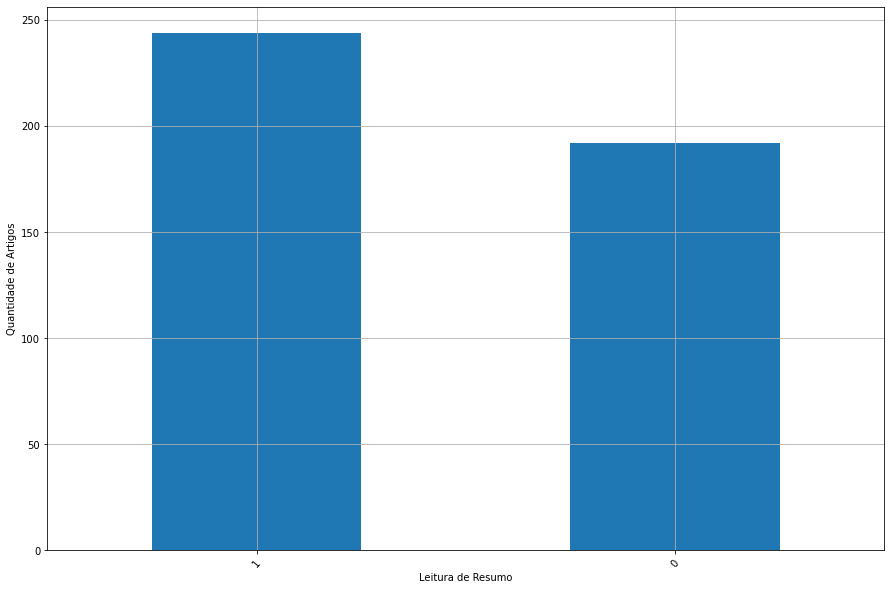

In [18]:
# colocar leganda 0 nao lido e 1 lido
plt.figure(figsize=(15,10))
leitura_resumo.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Leitura de Resumo")
plt.ylabel("Quantidade de Artigos")
plt.grid()
plt.show()

In [ ]:
## Dos separadas para ler, quais sao bons, execelentes e razoáveis

In [20]:
# Groupby by
status_resumo = df_trab_relacionados.groupby("status_resumo")

# Summary statistic of all
status_resumo.describe().head()

id_pubmed                                                       \
                  count          mean           std         min          25%   
status_resumo                                                                  
Bom                31.0  2.924913e+07  2.980847e+06  22195162.0  27114545.50   
Excelente           8.0  3.026771e+07  3.389636e+06  24777653.0  28007447.25   
Razoavel           21.0  2.839405e+07  2.660779e+06  24559132.0  26262130.00   
Ruim               87.0  3.061052e+07  1.725404e+06  25486901.0  29236028.50   

                                                   ano_publicacao_scopus  \
                      50%          75%         max                 count   
status_resumo                                                              
Bom            29254915.0  31596286.50  33936438.0                  49.0   
Excelente      31423695.5  32798517.25  33684612.0                  15.0   
Razoavel       28359255.0  29884988.00  33380331.0                  41.0   
Ruim           31135882.0  31783655.00  33936461.0                 140.0   

                            ... artigo_leitura       \
                      mean  ...            75%  max   
status_resumo               ...                       
Bom            2017.081633  ...            0.0  0.0   
Excelente      2018.466667  ...            0.0  0.0   
Razoavel       2017.268293  ...            0.0  0.0   
Ruim           2018.735714  ...            0.0  0.0   

              artigo_referencia_dissertacao                                     
                                      count mean  std  min  25%  50%  75%  max  
status_resumo                                                                   
Bom                                    49.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
Excelente                              15.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
Razoavel                               41.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
Ruim                                  140.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[4 rows x 160 columns]

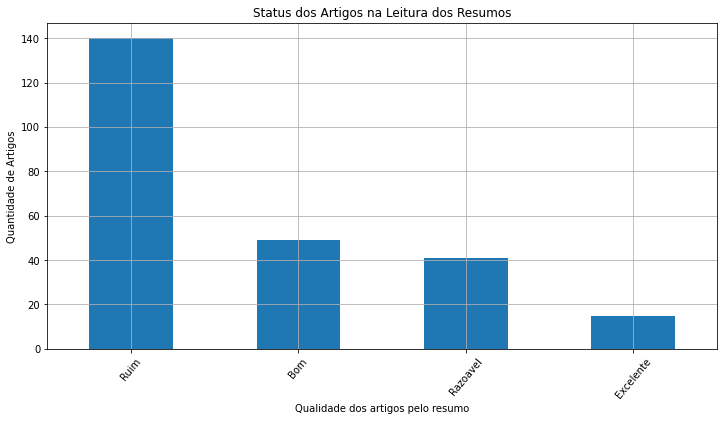

In [21]:
plt.figure(figsize=(12,6))
status_resumo.size().sort_values(ascending=False).plot.bar()
plt.title("Status dos Artigos na Leitura dos Resumos")
plt.xticks(rotation=50)
plt.xlabel("Qualidade dos artigos pelo resumo")
plt.ylabel("Quantidade de Artigos")
plt.grid()
plt.show()

# Artigos que podem entrar e nao entrou

- Pharmacovigilance in the era of social media: Discovering adverse drug events cross-relating Twitter and PubMed 
<br>(ao pesquisar   TITLE-ABS-KEY ( mining  AND for  AND adverse  AND drug  AND events  AND on  AND twitter ) ) = 28 resultados
- Detection of adverse drug reaction from twitter data
    - e outros com a query acima
- SSEL-ADE: A semi-supervised ensemble learning framework for extracting adverse drug events from social media, mesmo autor de um artigo interessante da pesquisa ()
- Adaptation of algorithms for medical information retrieval for working on russian-language text content



# Curiosidades

**dois artigos?**
<br>

Erratum to: Digital drug safety surveillance: Monitoring pharmaceutical products in Twitter (Drug Safety DOI: 10.1007/s40264-014-0155-x)

<br>

Digital drug safety surveillance: Monitoring pharmaceutical products in Twitter

# Exportação do resultado para Excel

## Planilhas

In [ ]:
df_trab_relacionados.columns

# Tempo de Execução do trabalho

In [24]:
data_fim = pd.Timestamp.now()
print(f'Programa iniciado em: {data_inicio}, e terminado em {data_fim}' )

Programa iniciado em: 2021-07-01 19:02:29.507816, e terminado em 2021-07-01 19:08:07.094439
